In [45]:
from becquerel import Spectrum
import numpy as np
import importlib
import sys
import matplotlib.pyplot as plt
sys.path.insert(0,r"C:\Users\benhu\Desktop\Research\radwatch-analysis")

import analysis_methods as am
import ROI
importlib.reload(am)
importlib.reload(ROI)

filename = 'UCB1901PetraleSole'
c = __import__("UCB1901PetraleSoleConfig")

In [10]:
specname = 'UCB1901PetraleSole' + '.spe'
path = r'C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019'
spectrum = path + r'\\' + specname
background = r'C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019\background.spe'
livetime = 173962 #s
wetweight = 519.9 #g

params = {
    '605': [1, [[-2, -1], [-0.75, 1.25], [1, 2]]],
    '609': [5, [[-2, -1], [-0.75, 0.75], [1, 2]]],
    '662': [5, [[-2, -1], [-0.4, 0.4], [1, 2]]],
    '1460': [15, [[-2, -1], [-0.5, 0.75], [1, 2]]],
    '2614': [20, [[-2, -1], [-0.4, 0.75], [1, 2]]],
}

spec = Spectrum.from_file(spectrum)
bgspec = Spectrum.from_file(background)
counts = spec.counts_vals
energies = spec.bin_centers_kev

roi = ROI.ROI(spec, bgspec, source_energies, 0)

SpeFile: Reading file C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019\\UCB1901PetraleSole.spe
SpeFile: Reading file C:\Users\benhu\Desktop\Research\DataFiles\fishsamples2019\background.spe


c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a fu

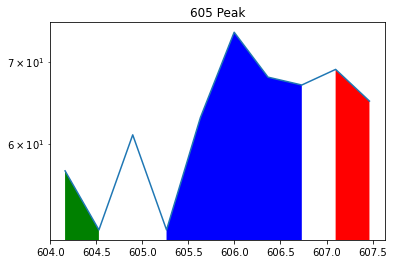

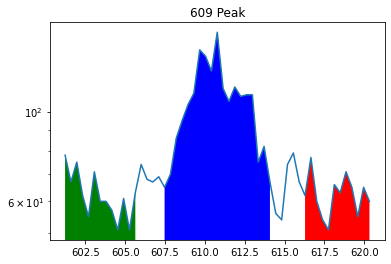

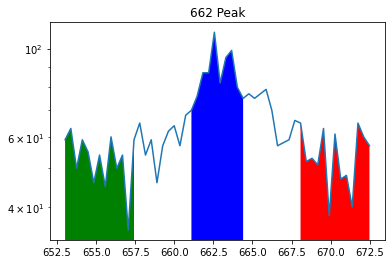

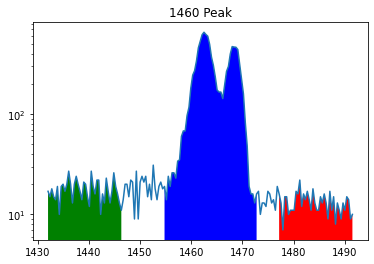

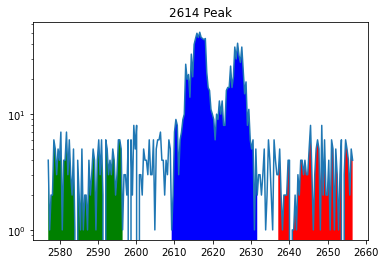

In [3]:
for key in params:
    roi.set_sideband(int(key), params[key][0], params[key][1])

roi.set_sideband(605, 1, [[-2, -1], [-0.75, 1.25], [1, 2]])
roi.set_sideband(609, 5, [[-2, -1], [-0.75, 0.75], [1, 2]])
roi.set_sideband(662, 5, [[-2, -1], [-0.4, 0.4], [1, 2]])
roi.set_sideband(1460, 15, [[-2, -1], [-0.5, 0.75], [1, 2]])
roi.set_sideband(2614, 20, [[-2, -1], [-0.4, 0.75], [1, 2]])

roi.plot_peak_region(spec, source_energies, 605)
roi.plot_peak_region(spec, source_energies, 609)
roi.plot_peak_region(spec, source_energies, 662)
roi.plot_peak_region(spec, source_energies, 1460)
roi.plot_peak_region(spec, source_energies, 2614)

In [4]:
roi.find_peak_energies()
roi_counts, roi_unc = roi.get_counts()
print(roi_counts)
print(roi_unc)

eff_func = am.Efficiency()
eff_func.set_parameters()

C:\Users\benhu\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
c:\users\benhu\desktop\research\becquerel\becquerel\core\spectrum.py:440: DeprecationWarning: energies_kev is deprecated and will be removed in a future release. Use bin_centers_kev instead.
  DeprecationWarning)


background spec sidebands 119.47543387736042
bg peak counts 312.112790747037
signal bg 121.0
signal peak 323.0
background spec sidebands 705.4420281185719
bg peak counts 1839.787439650814
signal bg 780.0
signal peak 1981.0
background spec sidebands 634.629341185642
bg peak counts 589.3226457546205
signal bg 694.5
signal peak 861.0
background spec sidebands 587.644619997916
bg peak counts 2498.915956884342
signal bg 615.0
signal peak 11124.000000000002
background spec sidebands 173.5078632432453
bg peak counts 1310.8737211375555
signal bg 181.5
signal peak 1196.9999999999998
[9.362643130323391, 66.654588467758, 211.80669543102158, 8597.728663113576, -121.86585789431047]
[27.483640728362705, 67.5537449273547, 45.98790402211696, 119.26541102466926, 51.820629605970424]
Loaded fit parameters 0-4: [-0.0530201  -0.23393142 -0.49270682 -1.0079565  -4.5553875 ]
Loaded input energies: []
Loaded energy uncertainties: [0.02016385 0.03079805 0.02757461 0.01707092 0.01090811 0.01032225]


In [5]:
efficiency = []
for i in source_energies:
    efficiency.append(eff_func.get_eff(i))

countrate = [i / livetime for i in roi_counts]
uncrate = [i / livetime for i in roi_unc]

print(efficiency)
print(countrate)
print(uncrate)

[0.019812801529679906, 0.019742405309284897, 0.018854421202205197, 0.01051768041536737, 0.004697785950678424]
[5.382004765594435e-05, 0.0003831560252684954, 0.0012175457595970476, 0.04942302723073761, -0.000700531483279742]
[0.00015798646099931426, 0.000388324719923631, 0.00026435603190419146, 0.0006855831217430776, 0.00029788476567279307]


In [6]:
sactivity, sactunc = [(i / j) / wetweight for i, j in zip(countrate, efficiency)], [(i / j) / wetweight for i, j in zip(uncrate, efficiency)]
for i, j, k in zip(source_energies, sactivity, sactunc):
    print("Specific activity at", i, "keV:", j, "±", k, "Bq/g (wet weight)")

Specific activity at 605 keV: 5.22490467504823e-06 ± 1.5337485465389967e-05 Bq/g (wet weight)
Specific activity at 609 keV: 3.732980989676023e-05 ± 3.7833381225843227e-05 Bq/g (wet weight)
Specific activity at 662 keV: 0.00012420877259303846 ± 2.6968463395784605e-05 Bq/g (wet weight)
Specific activity at 1460 keV: 0.009038358330371246 ± 0.00012537770886916975 Bq/g (wet weight)
Specific activity at 2614 keV: -0.0002868234239822744 ± 0.00012196500868514034 Bq/g (wet weight)


In [9]:
config = 'UCB1901PetraleSoleConfig'
importlib.import_module(config)

livetime

173962

In [ ]:
csvname = 'UCB1901PetraleSole' + '.spe'
with open('test.csv', mode='w') as test:
    tester = csv.writer(test, delimiter=',', quoting=csv.QUOTE_MINIMAL)

    tester.writerow([14, 2, 3])
    tester.writerow([4, 5, 6])
    tester.writerow([4, 5, 7])